In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def calc_mean(x):
    '''
    Calculates the mean of any series/or array. Equivalent to pd.mean or np.mean or mean
    Avoiding using inbuilt function
    '''
    sum_var=0
    for i in range(len(x)):
        sum_var=sum_var+x[i]
    return(sum_var/len(x))
def calc_var(x):
    '''
    Calculates the variance of any series/or array.
    Avoiding using inbuilt function
    '''
    mu=calc_mean(x)
    sum_var=0
    for i in range(len(x)):
        sum_var=sum_var+(x[i]-mu)*(x[i]-mu)
    return(sum_var/len(x))
def SD(x):
    sigma2=var(x)
    return(np.sqrt(sigma2))
def moving_average(win_size,series):
    '''
    win_size = windowsize
    series = time series
    '''
    ma=[]
    N=len(series)
    left=0
    right=win_size
    while right<N:
        window=series[left:right]
        ma.append(calc_mean(window))
        left=left+1
        right=right+1
    return ma
def autocovariance(x,h):
    n=len(x)
    mu=calc_mean(x)
    S=0
    for i in range(n-abs(h)):
        S=S+(x[i+abs(h)]-mu)*(x[i]-mu)
    gamma=(1.0/n)*S
    return(gamma)
def autocorrelation(x,h):
    return(autocovariance(x,h)/autocovariance(x,0))

In [3]:
df=pd.read_csv('data/astsa-data/soi.csv')

In [4]:
df.head

<bound method NDFrame.head of      Unnamed: 0         time    val
0             1  1950.000000  0.377
1             2  1950.083333  0.246
2             3  1950.166667  0.311
3             4  1950.250000  0.104
4             5  1950.333333 -0.016
..          ...          ...    ...
448         449  1987.333333 -0.126
449         450  1987.416667 -0.508
450         451  1987.500000 -0.388
451         452  1987.583333  0.388
452         453  1987.666667  0.071

[453 rows x 3 columns]>

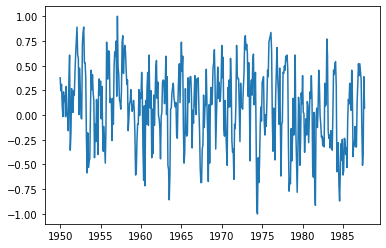

In [5]:
plt.plot(df['time'],df['val'])

In [6]:
df_solar=pd.read_csv('data/Sunspots.csv')
df_solar.head

<bound method NDFrame.head of       Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0              0  1749-01-31                               96.7
1              1  1749-02-28                              104.3
2              2  1749-03-31                              116.7
3              3  1749-04-30                               92.8
4              4  1749-05-31                              141.7
...          ...         ...                                ...
3260        3260  2020-09-30                                0.6
3261        3261  2020-10-31                               14.4
3262        3262  2020-11-30                               34.0
3263        3263  2020-12-31                               21.8
3264        3264  2021-01-31                               10.4

[3265 rows x 3 columns]>

In [7]:
df_solar['Date'] = pd.to_datetime(df_solar.Date)

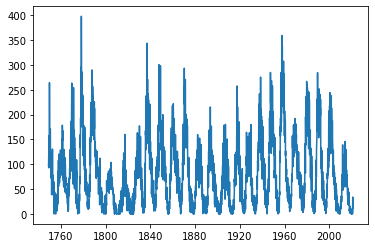

In [8]:
plt.plot(df_solar['Date'],df_solar['Monthly Mean Total Sunspot Number'])

In [9]:
D=df_solar[df_solar['Date']>pd.to_datetime('1980')]

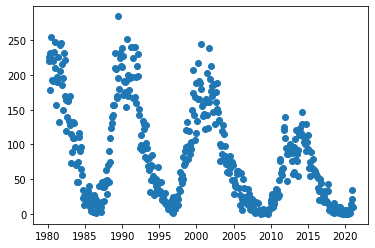

In [10]:
plt.plot(D['Date'],D['Monthly Mean Total Sunspot Number'],'o')


In [11]:
len(D['Date'])

493

In [12]:
ma=moving_average(50,list(D['Monthly Mean Total Sunspot Number']))

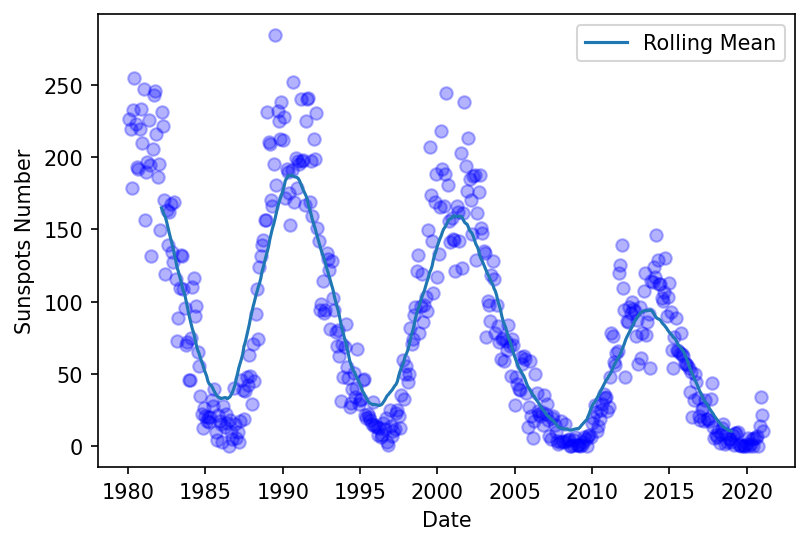

In [13]:
fig=plt.figure(dpi=150)
plt.xlabel('Date')
plt.ylabel('Sunspots Number')
plt.plot(D['Date'],D['Monthly Mean Total Sunspot Number'],'bo',alpha=0.3)
plt.plot(D['Date'][25:493-25],ma,label='Rolling Mean')
plt.legend()

## AR(1) Process
$$y_t=\alpha y_{t-1} + u_t$$ 

In [14]:
import random
N=500
y=[0.1]
alpha=0.4
for i in range(1,N):
    y.append(alpha*y[i-1]+np.random.normal(0,1))

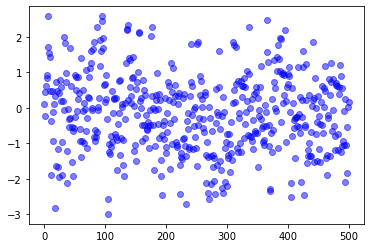

In [15]:
plt.plot(y,'bo',alpha=0.5)

In [16]:
np.diff(y)

array([-3.33493689e-01,  6.89006831e-01,  1.55752950e-01,  2.37285487e-01,
        8.74502002e-02,  7.88743793e-01,  8.55896805e-01, -1.03655484e+00,
       -9.78598754e-02, -9.68104951e-01, -8.57423237e-01, -1.52121767e+00,
        2.37398866e+00, -1.40345467e+00,  8.15265971e-01,  2.15216111e-01,
        2.47013253e-01, -3.16558898e+00,  1.17908542e+00,  2.37960590e+00,
       -2.61755885e-01, -2.13490281e+00,  4.97611645e-01, -7.74571757e-01,
        2.34087338e+00,  3.88581468e-01, -2.11379820e-01, -3.83441617e-01,
       -2.09766199e+00,  9.43704581e-01,  1.15719933e+00, -2.58544272e-01,
        2.04730144e+00, -1.53877305e-01, -8.66267608e-01, -2.49871876e-01,
       -1.92851784e+00, -9.04038829e-01,  2.08665448e+00, -5.17064752e-01,
        2.28727904e-01,  2.00086319e+00, -1.97395046e+00,  9.05613231e-01,
       -1.15537956e+00, -9.93910256e-01, -3.95498820e-01,  1.26257095e+00,
        9.63829201e-02,  3.13348107e-01,  1.18980810e+00, -4.20900075e-01,
        3.62201835e-01, -

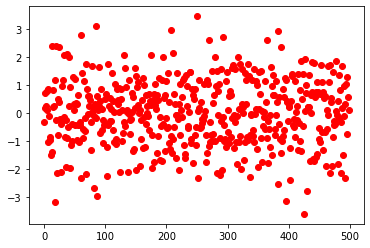

In [17]:
plt.plot(np.diff(y),'ro')

In [18]:
ma=moving_average(10,y)

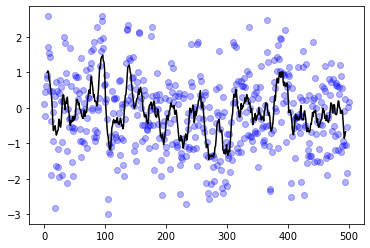

In [19]:
x=range(N)
x1=range(5,N-5)
plt.plot(y,'bo',alpha=0.3)
plt.plot(x1,ma,'black')

In [20]:
cdf=pd.read_csv('data/data_climate.csv')

In [21]:
cdf.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [22]:
cdf['datetime_utc']=pd.to_datetime(cdf['datetime_utc'])
#df_solar['Date'] = pd.to_datetime(df_solar.Date)

In [23]:
cdf[' _tempm']

0         30.0
1         28.0
2         24.0
3         24.0
4         23.0
          ... 
100985    34.0
100986    38.0
100987    36.0
100988    32.0
100989    30.0
Name:  _tempm, Length: 100990, dtype: float64

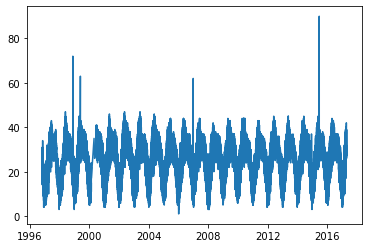

In [24]:
plt.plot(cdf['datetime_utc'],cdf[' _tempm'])

In [25]:
pdf=pd.read_csv('data/measurements (1).csv')
pdf

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-12-30T14:15:00+00:00,2020-12-30T19:45:00+05:30,pm25,127.06,µg/m³,28.591825,77.227307
1,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-12-30T14:15:00+00:00,2020-12-30T19:45:00+05:30,pm10,226.84,µg/m³,28.591825,77.227307
2,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-12-30T13:45:00+00:00,2020-12-30T19:15:00+05:30,pm25,109.82,µg/m³,28.591825,77.227307
3,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-12-30T13:45:00+00:00,2020-12-30T19:15:00+05:30,pm10,212.02,µg/m³,28.591825,77.227307
4,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-12-30T12:45:00+00:00,2020-12-30T18:15:00+05:30,pm10,215.23,µg/m³,28.591825,77.227307
...,...,...,...,...,...,...,...,...,...,...,...
31919,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-01-02T04:00:00+00:00,2020-01-02T09:30:00+05:30,pm10,436.08,µg/m³,28.591825,77.227307
31920,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-01-02T01:00:00+00:00,2020-01-02T06:30:00+05:30,pm10,462.34,µg/m³,28.591825,77.227307
31921,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-01-02T01:00:00+00:00,2020-01-02T06:30:00+05:30,pm25,407.84,µg/m³,28.591825,77.227307
31922,5634,"Lodhi Road, Delhi - IMD",Delhi,IN,2020-01-01T01:15:00+00:00,2020-01-01T06:45:00+05:30,pm10,557.22,µg/m³,28.591825,77.227307


In [26]:
list(pdf.keys())

['locationId',
 'location',
 'city',
 'country',
 'utc',
 'local',
 'parameter',
 'value',
 'unit',
 'latitude',
 'longitude']

In [27]:
Pdf=pdf[pdf['parameter']=='pm10']

In [28]:
Pdf['local']

1        2020-12-30T19:45:00+05:30
3        2020-12-30T19:15:00+05:30
4        2020-12-30T18:15:00+05:30
6        2020-12-30T17:30:00+05:30
8        2020-12-30T17:15:00+05:30
                   ...            
31915    2020-01-02T13:15:00+05:30
31917    2020-01-02T12:15:00+05:30
31919    2020-01-02T09:30:00+05:30
31920    2020-01-02T06:30:00+05:30
31922    2020-01-01T06:45:00+05:30
Name: local, Length: 15962, dtype: object

In [29]:
#plt.plot(Pdf['local'],Pdf['value'])

In [30]:
fmri_df=pd.read_csv('data/astsa-data/fmri1.csv')

In [31]:
fmri_df.head()

,Unnamed: 0,time,val.time,val.cort1,val.cort2,val.cort3,val.cort4,val.thal1,val.thal2,val.cere1,val.cere2
0,1,1,1,-0.336,-0.088,-0.579,-0.221,-0.222,-0.046,-0.354,-0.028
1,2,2,2,-0.192,-0.359,-0.475,-0.058,0.072,-0.039,-0.346,-0.032
2,3,3,3,0.062,0.062,0.063,0.192,0.145,-0.256,-0.337,0.272
3,4,4,4,0.128,0.221,0.234,-0.004,-0.104,-0.030,0.149,0.042
4,5,5,5,0.358,0.199,0.388,0.255,0.035,-0.081,0.311,-0.080


In [32]:
fmri_df['val.time']

0        1
1        2
2        3
3        4
4        5
      ... 
123    124
124    125
125    126
126    127
127    128
Name: val.time, Length: 128, dtype: int64

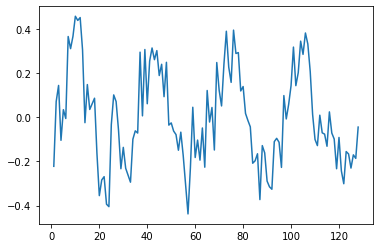

In [33]:
plt.plot(fmri_df['time'],fmri_df['val.thal1'])

In [34]:
gdp_df=pd.read_csv('data/astsa-data/gdp.csv')
gdp_df.keys()

Index(['Unnamed: 0', 'time', 'val'], dtype='object')

In [35]:
gdp_df['time']=pd.to_datetime(gdp_df['time'])


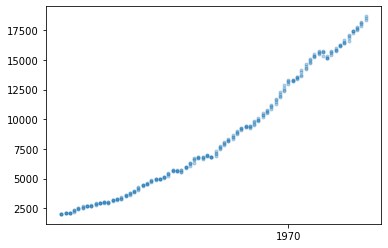

In [36]:
plt.plot(gdp_df['time'],gdp_df['val'],'.',alpha=0.3)

In [37]:
val_diff=np.diff(gdp_df['val'])

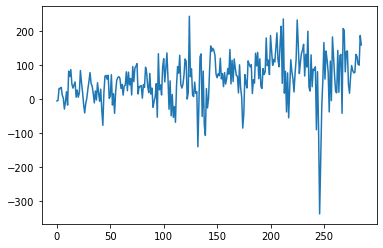

In [38]:
plt.plot(val_diff)

In [39]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

In [40]:
adf_test(gdp_df['val'])

Results of Dickey-Fuller Test:
Test Statistic                   2.981443
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [41]:
adf_test(fmri_df['val.thal1'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.225751
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [42]:
adf_test(y)

Results of Dickey-Fuller Test:
Test Statistic                -6.482070e+00
p-value                        1.287645e-08
#Lags Used                     7.000000e+00
Number of Observations Used    4.920000e+02
Critical Value (1%)           -3.443711e+00
Critical Value (5%)           -2.867432e+00
Critical Value (10%)          -2.569908e+00
dtype: float64


In [43]:
adf_test(D['Monthly Mean Total Sunspot Number'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.015685
p-value                          0.033455
#Lags Used                      14.000000
Number of Observations Used    478.000000
Critical Value (1%)             -3.444105
Critical Value (5%)             -2.867606
Critical Value (10%)            -2.570001
dtype: float64


In [44]:
D['Monthly Mean Total Sunspot Number']

2772    226.1
2773    219.4
2774    178.7
2775    232.2
2776    254.7
        ...  
3260      0.6
3261     14.4
3262     34.0
3263     21.8
3264     10.4
Name: Monthly Mean Total Sunspot Number, Length: 493, dtype: float64

<StemContainer object of 3 artists>

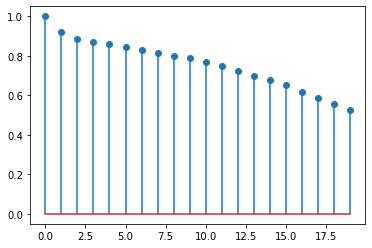

In [45]:
AC=[]
for x in range(20):
    AC.append(autocorrelation(list(df_solar['Monthly Mean Total Sunspot Number']),x))
plt.stem(AC)

<StemContainer object of 3 artists>

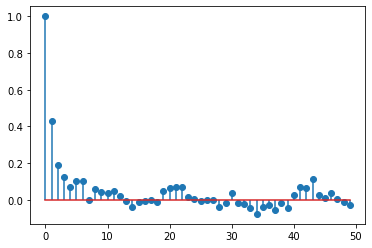

In [46]:
AC=[]
for x in range(50):
    AC.append(autocorrelation(list(y),x))
plt.stem(AC)

<StemContainer object of 3 artists>

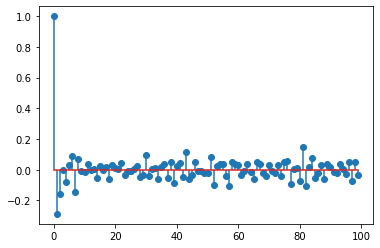

In [47]:
AC=[]
for x in range(100):
    AC.append(autocorrelation(list(np.diff(y)),x))
plt.stem(AC)

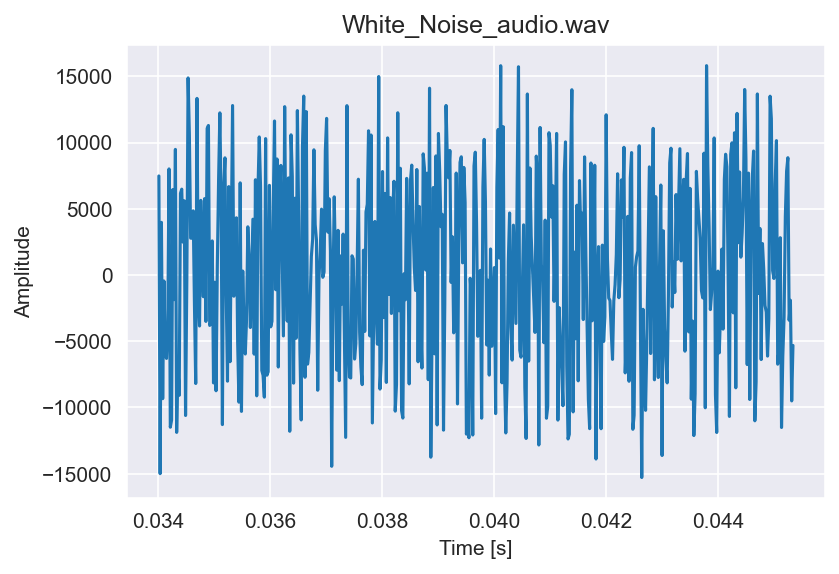

44100

In [154]:
from scipy.io.wavfile import read
samplerate, data = read('data/xd18s-r5h3z.wav')
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
#plt.plot(time,data[:][0])
data_left=[]
data_right=[]
for i in range(len(data)):
    data_left.append(data[i][0])
    data_right.append(data[i][1])
fig=plt.figure(dpi=150)
plt.plot(time[1500:2000],data_left[1500:2000])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('White_Noise_audio.wav')
plt.show()
len(data)

<StemContainer object of 3 artists>

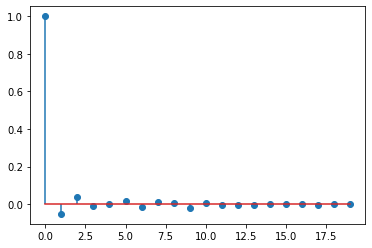

In [49]:
AC=[]
for x in range(20):
    AC.append(autocorrelation(data_left,x))
plt.stem(AC)

In [158]:
adf(list(data_left[1500:2500]),0)

C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in short_scalars
  
C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in short_scalars
  import sys


-0.0024921138842664103

In [50]:
#Defining ADF FULLER TEST
def get_slope_LR(x,y):
    X2=[]
    XY=[]
    for i in range(len(x)):
        X2.append(x[i]*x[i])
        XY.append(x[i]*y[i])
    m=(calc_mean(XY)-calc_mean(x)*calc_mean(y))/(calc_mean(X2)-calc_mean(x)*calc_mean(x))
    return m
def adf(y,typ):
    ydiff=[]
    for i in range(1,len(y)):
        ydiff.append(y[i]-y[i-1])
    m=get_slope_LR(y[0:len(y)-1],ydiff)
    return (m)
        

In [51]:
adf(y,0)

-0.5694062702468966

In [52]:
yn=y[1:len(y)]
y[0:2]

[0.1, -0.23349368908573168]

In [53]:
yn[0]

-0.23349368908573168

In [54]:
#import random
N=500
y2=[0.001]
alpha=.5
for i in range(1,N):
    y2.append(0.2*i+alpha*y[i-1]+random.random())

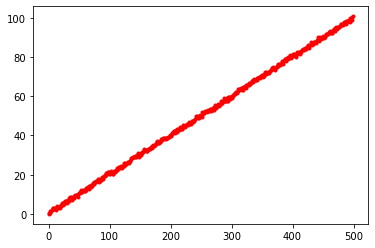

In [55]:
plt.plot(y2,'r.')

In [56]:
DJI=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/DJIA8012.csv')

In [57]:
DJI.head()

,Unnamed: 0,dat
0,1980-01-01,838.74
1,1980-01-02,824.57
2,1980-01-03,820.31
3,1980-01-04,828.84
4,1980-01-07,832.00


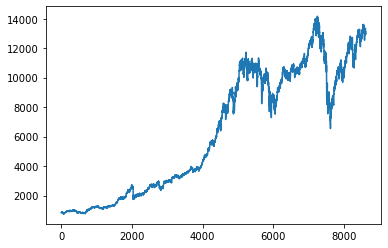

In [58]:
plt.plot(DJI['dat'])

In [59]:
adf_test(DJI['dat'][4500:6500])

Results of Dickey-Fuller Test:
Test Statistic                   -2.909282
p-value                           0.044279
#Lags Used                        0.000000
Number of Observations Used    1999.000000
Critical Value (1%)              -3.433625
Critical Value (5%)              -2.862987
Critical Value (10%)             -2.567540
dtype: float64


In [146]:
adf(list(DJI['dat'][4500:6500]),0)

-0.006371532912710417

In [60]:
DJI.keys()

Index(['Unnamed: 0', 'dat'], dtype='object')

In [61]:
DJI.rename( columns={'Unnamed: 0':'Date'}, inplace=True )

In [62]:
DJI['Date'] = pd.to_datetime(DJI.Date)
import seaborn as sns
sns.set_style("darkgrid")
print(DJI['Date'])

0      1980-01-01
1      1980-01-02
2      1980-01-03
3      1980-01-04
4      1980-01-07
          ...    
8605   2012-12-25
8606   2012-12-26
8607   2012-12-27
8608   2012-12-28
8609   2012-12-31
Name: Date, Length: 8610, dtype: datetime64[ns]


Text(0.5, 1.0, 'Dow Jones Index from 1980 to 2012')

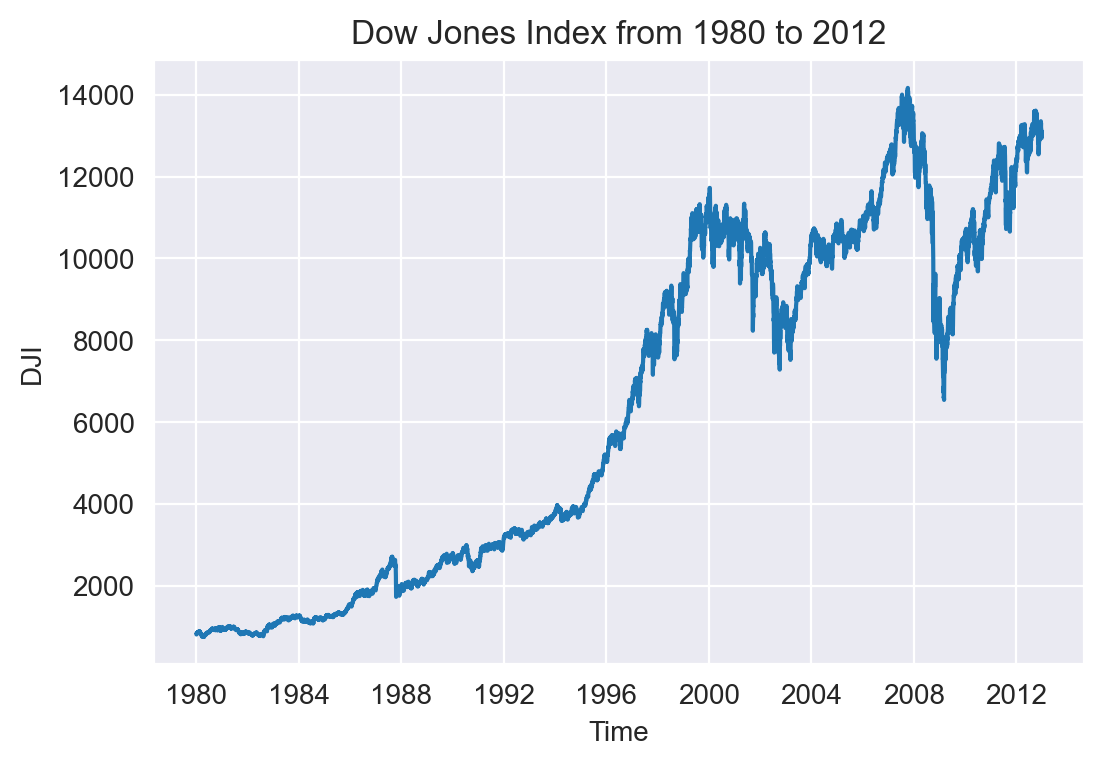

In [63]:
fig=plt.figure(dpi=200)
plt.plot(DJI['Date'],DJI['dat'])
plt.xlabel('Time')
plt.ylabel('DJI')
plt.title("Dow Jones Index from 1980 to 2012")

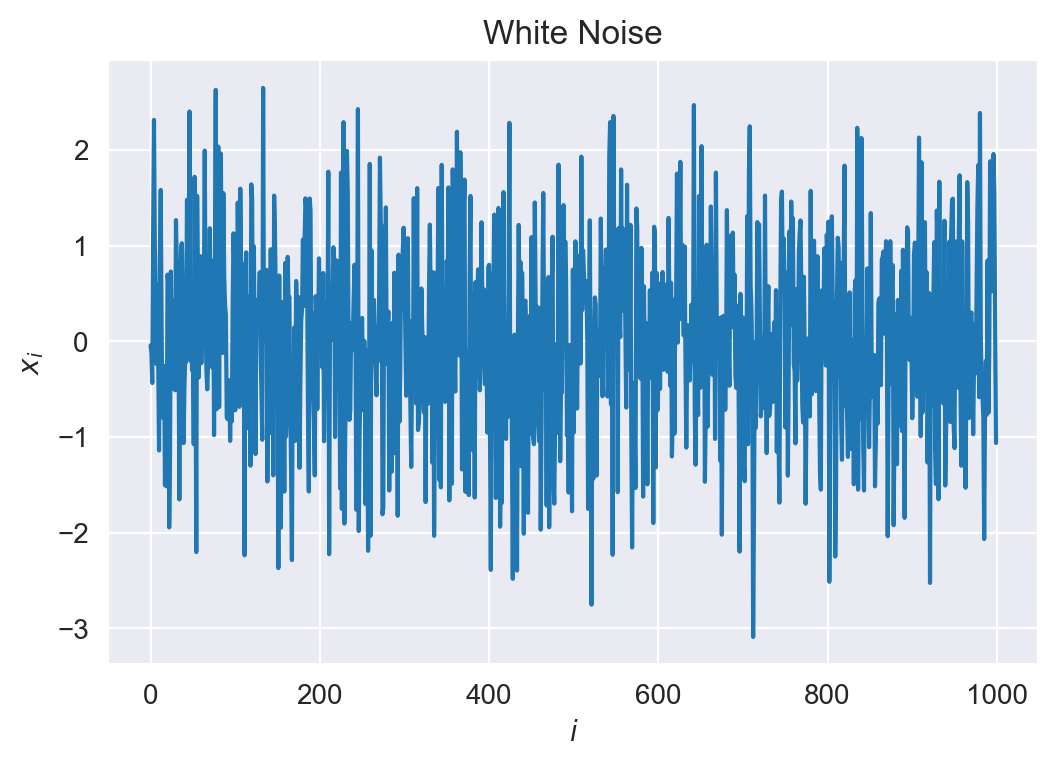

In [64]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
fig=plt.figure(dpi=200)
plt.xlabel('$i$')
plt.ylabel('$x_i$')
plt.title("White Noise")
plt.plot(samples)
plt.show()


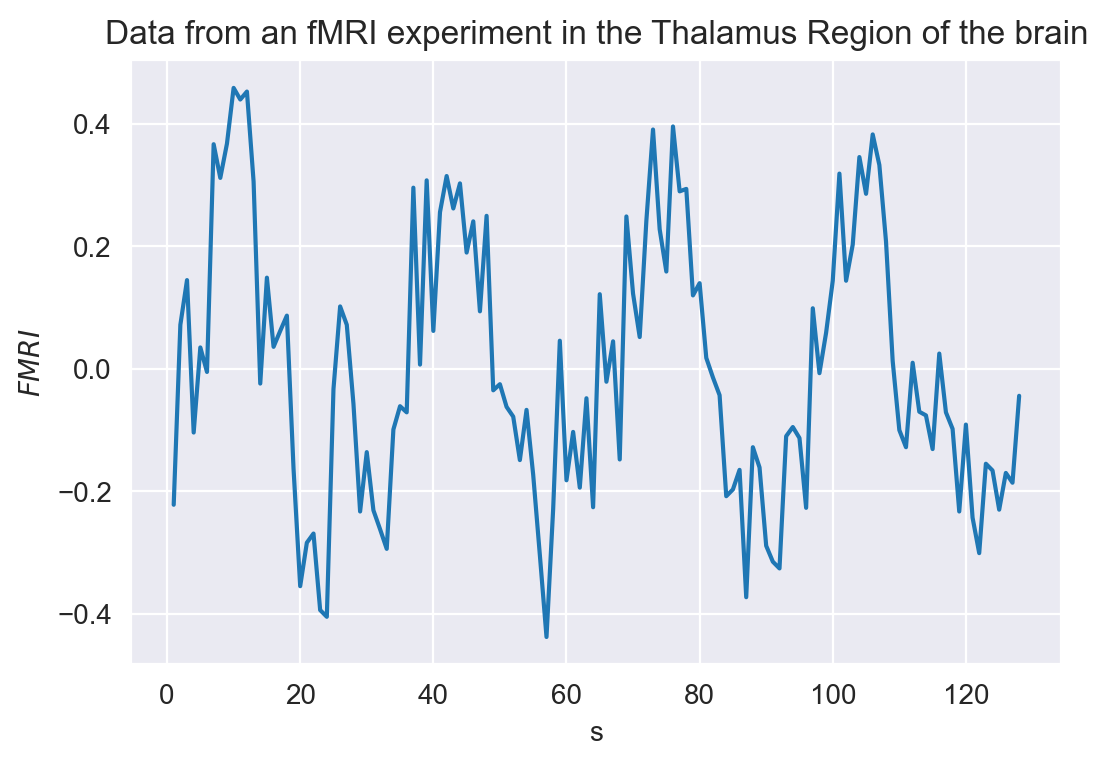

In [65]:
fig=plt.figure(dpi=200)
plt.xlabel('s')
plt.ylabel('$FMRI$')
plt.title("Data from an fMRI experiment in the Thalamus Region of the brain")
plt.plot(fmri_df['time'],fmri_df['val.thal1'])


In [66]:
ha=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/openintro/ami_occurrences.csv')

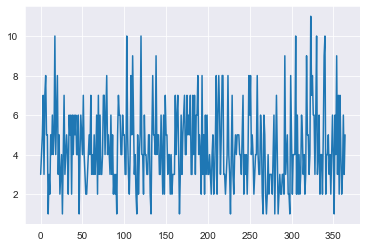

In [67]:
plt.plot(ha.ami)

In [68]:
co=pd.read_csv('data/astsa-data/co2.csv')
co['date'] = pd.to_datetime(co.date)


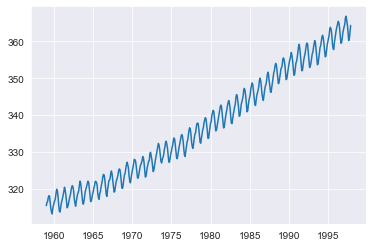

In [69]:
plt.plot(co.date,co.data)

In [70]:
gtemp=pd.read_csv('data/astsa-data/globaltemp.csv')

In [71]:
#gtemp['year']=pd.to_datetime(gtemp.year)
gtemp

,year,data
0,1880,-0.20
1,1881,-0.11
2,1882,-0.10
3,1883,-0.20
4,1884,-0.28
...,...,...
131,2011,0.60
132,2012,0.63
133,2013,0.66
134,2014,0.75


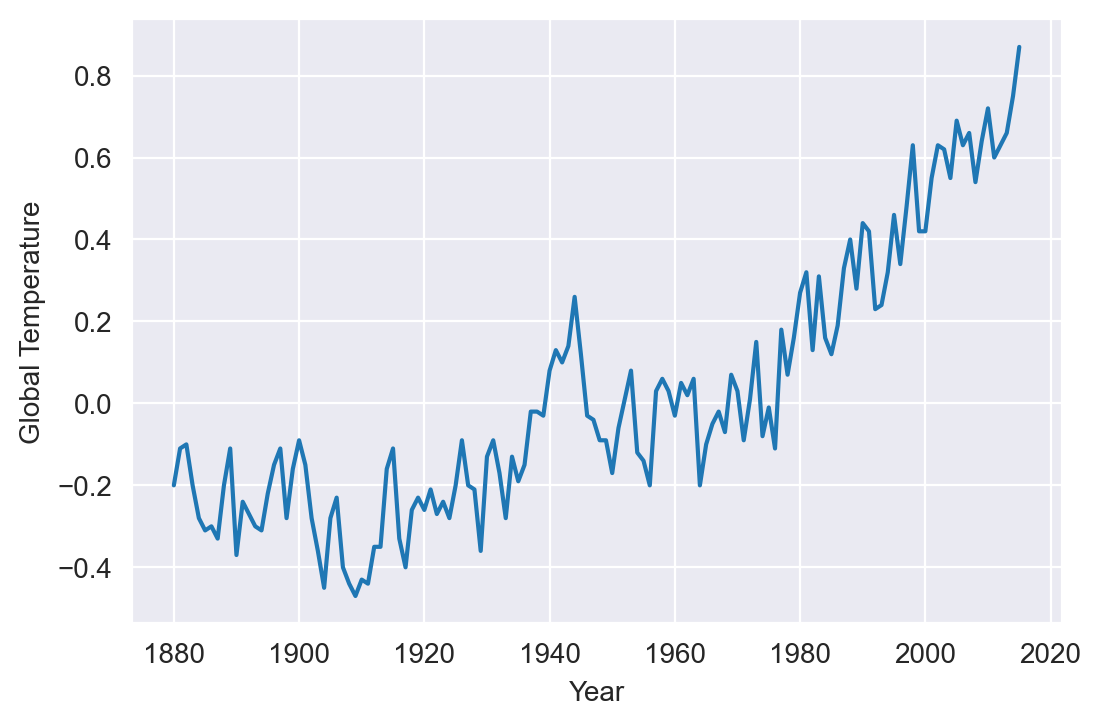

In [72]:
fig=plt.figure(dpi=200)
plt.xlabel('Year')
plt.ylabel('Global Temperature')
#plt.title("Data from an fMRI experiment in the Thalamus Region of the brain")
plt.plot(gtemp.year,gtemp.data)

In [73]:
Gtemp_land=pd.read_csv('data/astsa-data/gtemp_land.csv')

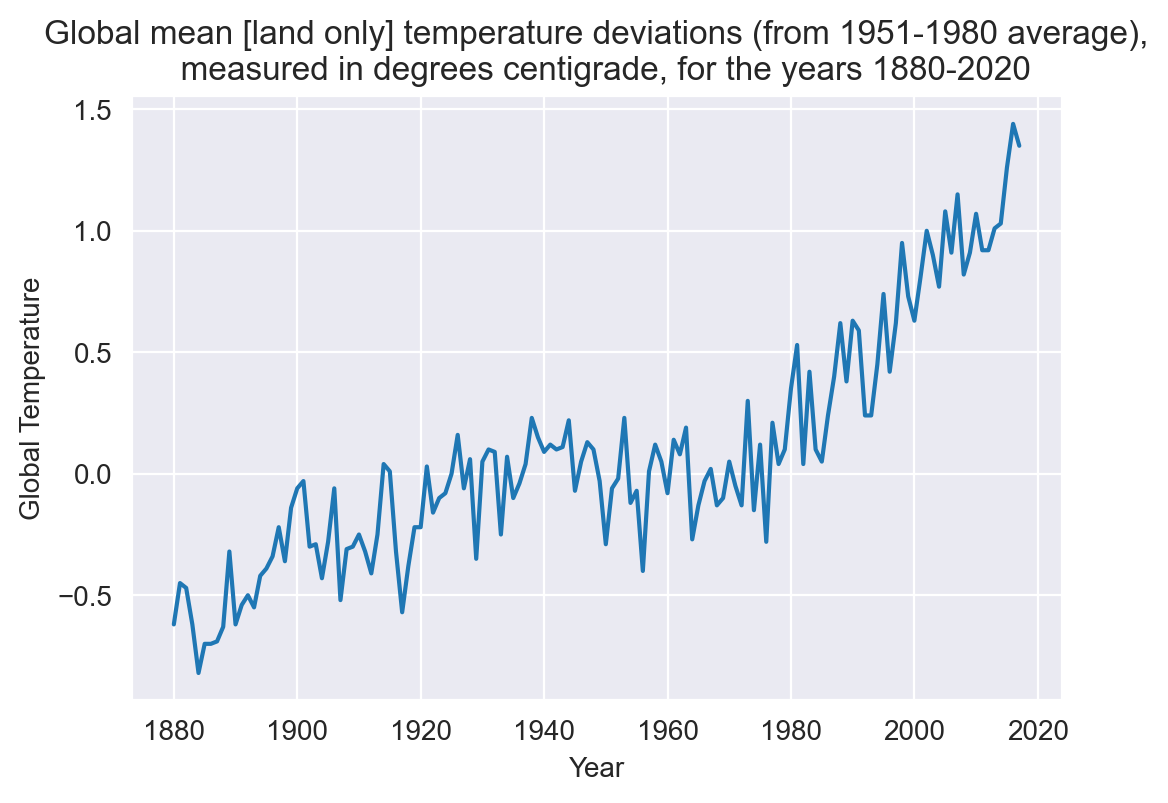

In [74]:
fig=plt.figure(dpi=200)
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.title("Global mean [land only] temperature deviations (from 1951-1980 average),\n  measured in degrees centigrade, for the years 1880-2020")
plt.plot(Gtemp_land.time,Gtemp_land.val)

In [75]:
eco_df=pd.read_csv('data/india_econ.csv')

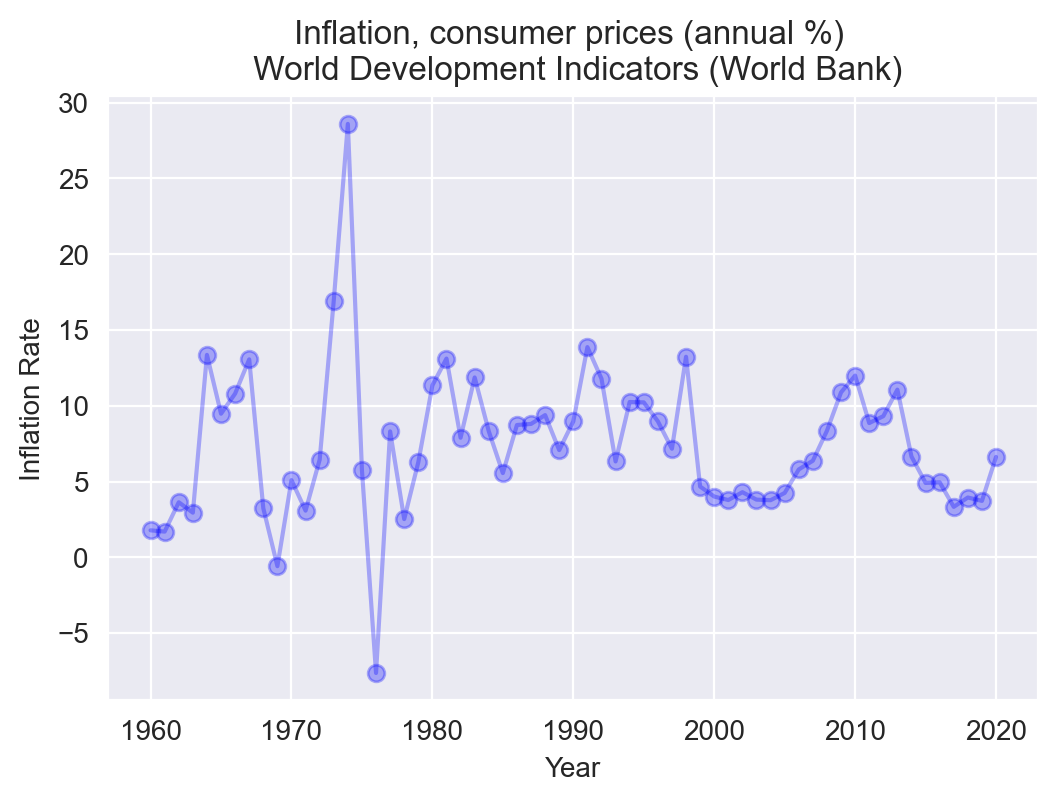

In [76]:
fig=plt.figure(dpi=200)
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation, consumer prices (annual %) \n World Development Indicators (World Bank)')
plt.plot(eco_df['Year'],eco_df.Inflation,'b-o',alpha=0.3)

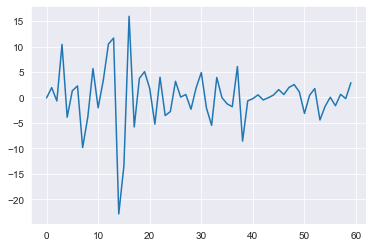

In [77]:
plt.plot(np.diff(eco_df.Inflation))

In [258]:
adf_test(list(eco_df.Inflation))

Results of Dickey-Fuller Test:
Test Statistic                 -4.852216
p-value                         0.000043
#Lags Used                      4.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [79]:
adf(list(eco_df.Inflation),0)

-0.6586520700491252

In [80]:
adf(list(np.diff(eco_df.Inflation)),0)

-1.1520309733185041

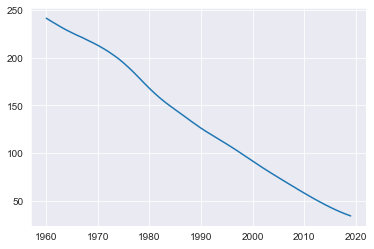

In [81]:
plt.plot(eco_df['Year'],eco_df.Child_Mortality)

In [82]:
adf(list(eco_df.Child_Mortality[0:len(eco_df)-1]),0)

-0.0034478471363216063

In [83]:
adf_test(list(eco_df.Child_Mortality[0:len(eco_df)-1]))

Results of Dickey-Fuller Test:
Test Statistic                 -4.034130
p-value                         0.001242
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


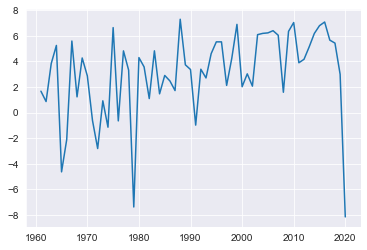

In [84]:
plt.plot(eco_df['Year'],eco_df['GDP per capita growth (annual %)'])

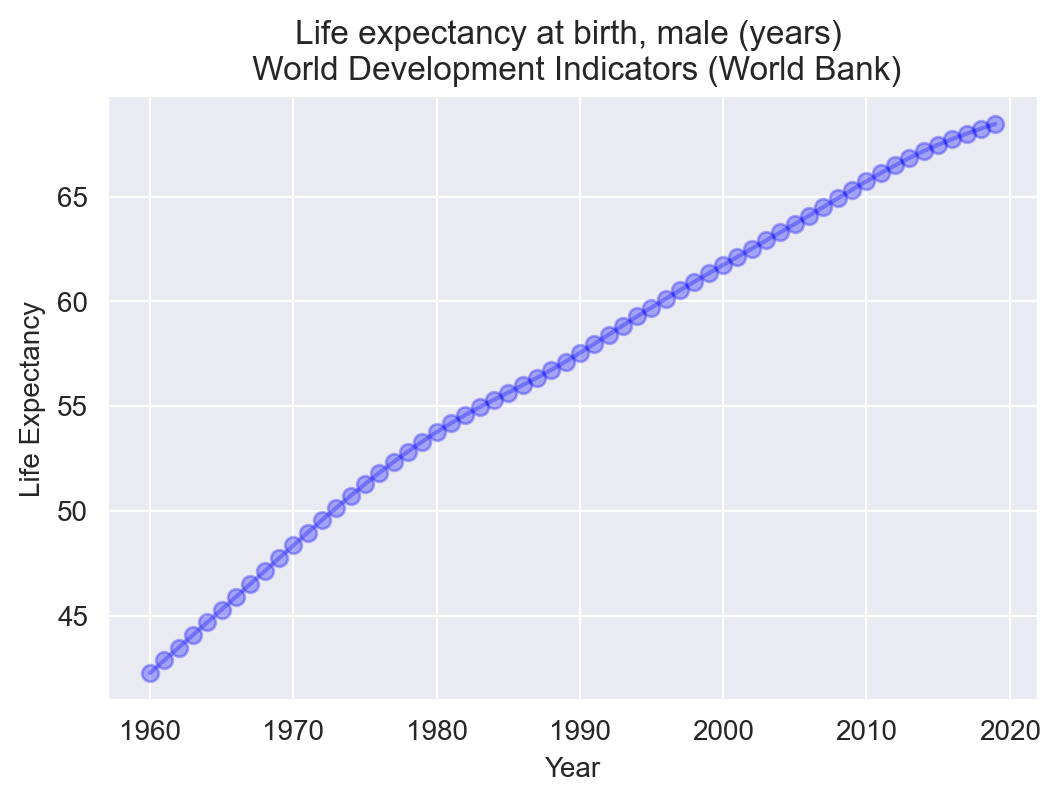

In [259]:
fig=plt.figure(dpi=200)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life expectancy at birth, male (years) \n World Development Indicators (World Bank)')
plt.plot(eco_df['Year'],eco_df['Life_expectancy'],'b-o',alpha=0.3)

In [86]:
adf_test(list(eco_df.Life_expectancy[0:len(eco_df)-1]))

Results of Dickey-Fuller Test:
Test Statistic                 -2.426690
p-value                         0.134345
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [261]:
adf_test(eco_df['Life_expectancy'][0:len(eco_df)-1])

Results of Dickey-Fuller Test:
Test Statistic                 -2.426690
p-value                         0.134345
#Lags Used                      6.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [87]:
adf(list(eco_df.Life_expectancy[0:len(eco_df)-1]),0)

-0.012621143672997982

In [88]:
adf_test(samples)

Results of Dickey-Fuller Test:
Test Statistic                -1.638408e+01
p-value                        2.733754e-29
#Lags Used                     3.000000e+00
Number of Observations Used    9.960000e+02
Critical Value (1%)           -3.436933e+00
Critical Value (5%)           -2.864446e+00
Critical Value (10%)          -2.568317e+00
dtype: float64


In [89]:
def divide_mean(samples):
    ARR=[samples[0:int(len(samples)/2)],samples[int(len(samples)/2):len(samples)]]
    for arr in ARR:
        print(len(arr))
        print(calc_mean(arr))
        print(calc_var(arr))

In [90]:
#ARR[1]

In [91]:
divide_mean(list(df['val']))

226
0.1188230084070796
0.12656831436158675
227
0.04142290572687225
0.1626993825569138


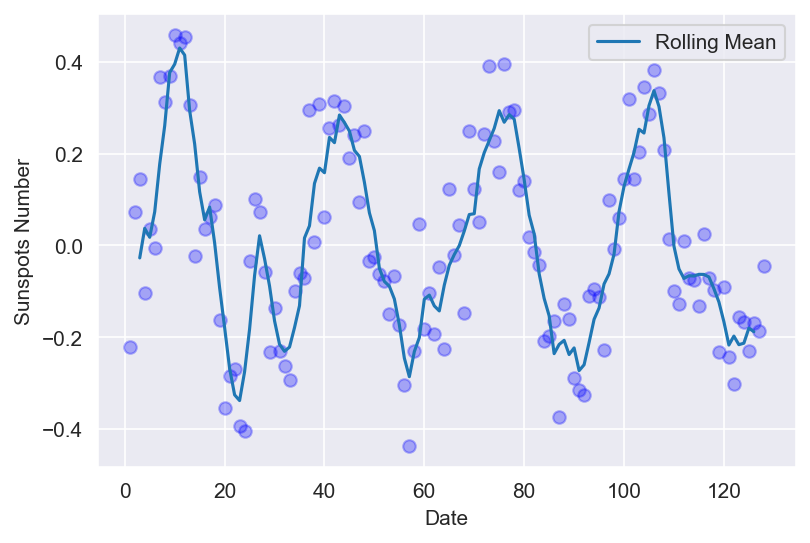

In [92]:
fig=plt.figure(dpi=150)
window_size=4
ma=moving_average(window_size,list(fmri_df['val.thal1']))
plt.xlabel('Date')
plt.ylabel('Sunspots Number')
plt.plot(fmri_df['time'],fmri_df['val.thal1'],'bo',alpha=0.3)
plt.plot(fmri_df['time'][int(window_size/2):len(fmri_df)-int(window_size/2)],ma,label='Rolling Mean')
plt.legend()

In [93]:
resid=np.array(fmri_df['val.thal1'][int(window_size/2):len(fmri_df)-int(window_size/2)])-np.array(ma)

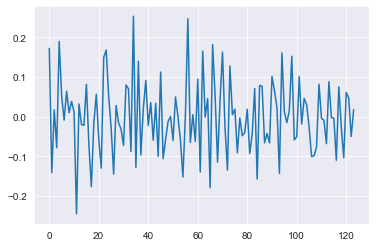

In [94]:
plt.plot(resid)

In [95]:
adf_test(list(resid))

Results of Dickey-Fuller Test:
Test Statistic                -5.830479e+00
p-value                        3.986000e-07
#Lags Used                     3.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64


In [96]:
adf_test(fmri_df['val.thal1'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.225751
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


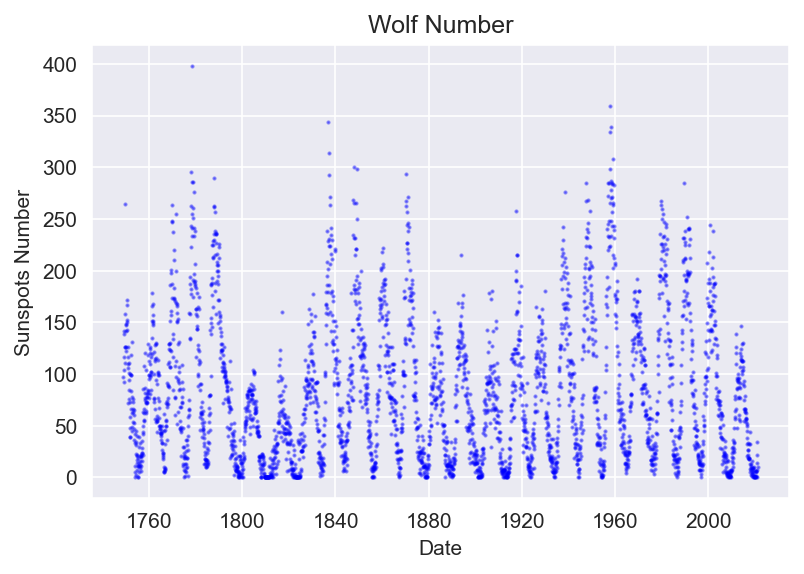

In [97]:
fig=plt.figure(dpi=150)
window_size=1000
ma=moving_average(window_size,list(df_solar['Monthly Mean Total Sunspot Number']))
plt.xlabel('Date')
plt.ylabel('Sunspots Number')
plt.title('Wolf Number')
#plt.plot(df_solar['Date'][int(window_size/2):len(df_solar)-int(window_size/2)],ma,'black',label='Rolling Mean',alpha=0.5)
plt.plot(df_solar['Date'],df_solar['Monthly Mean Total Sunspot Number'],'b.',alpha=0.4,markersize=2)

In [98]:
D=df_solar[df_solar['Date']>pd.to_datetime('1980')]

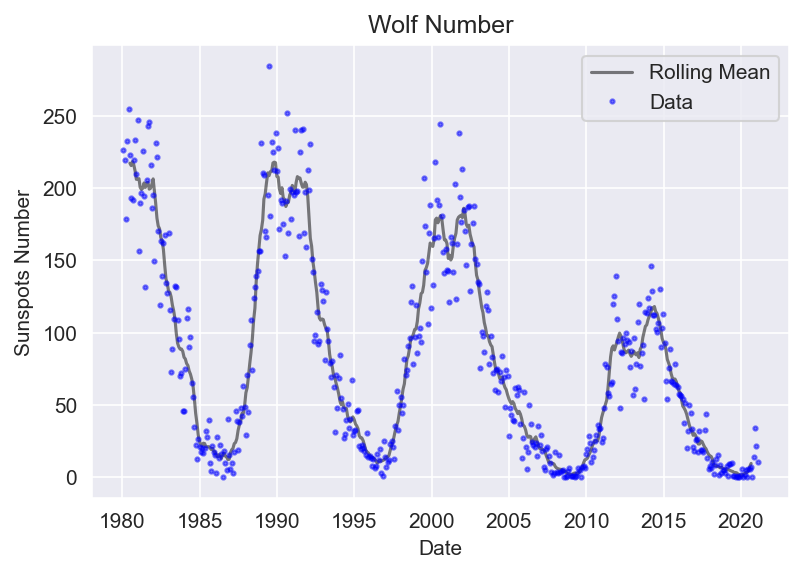

In [99]:
fig=plt.figure(dpi=150)
window_size=10
ma=moving_average(window_size,list(D['Monthly Mean Total Sunspot Number']))
plt.xlabel('Date')
plt.ylabel('Sunspots Number')
plt.title('Wolf Number')
plt.plot(D['Date'][int(window_size/2):len(D)-int(window_size/2)],ma,'black',label='Rolling Mean',alpha=0.5)
plt.plot(D['Date'],D['Monthly Mean Total Sunspot Number'],'b.',alpha=0.5,markersize=4,label='Data')
plt.legend()

In [100]:
divide_mean(list(df_solar['Monthly Mean Total Sunspot Number']))

1632
80.97120098039214
4399.795310322344
1633
82.58585425597069
4813.858801735036


In [101]:
df_solar['Date'][len(df_solar)-1]

Timestamp('2021-01-31 00:00:00')

In [102]:
np.sqrt(4399)

66.32495759516172

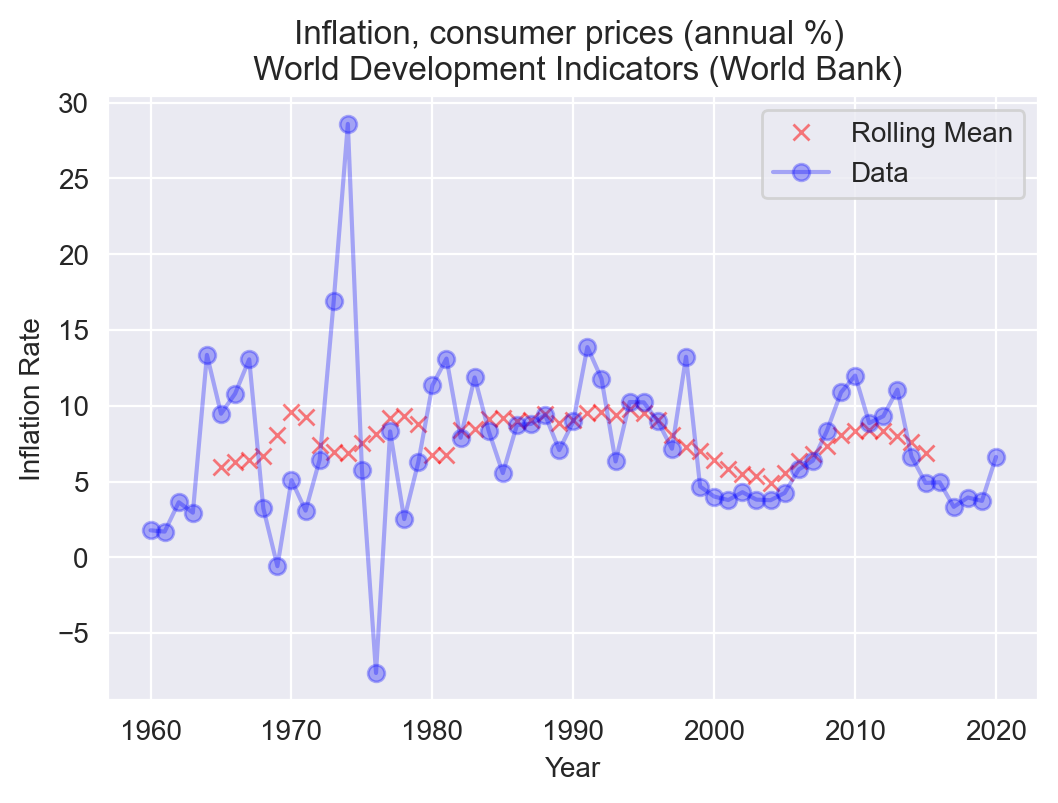

In [103]:
fig=plt.figure(dpi=200)
window_size=10
ma=moving_average(window_size,list(eco_df['Inflation']))
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation, consumer prices (annual %) \n World Development Indicators (World Bank)')
plt.plot(eco_df['Year'][int(window_size/2):len(eco_df)-int(window_size/2)],ma,'rx',label='Rolling Mean',alpha=0.5)
plt.plot(eco_df['Year'],eco_df.Inflation,'b-o',alpha=0.3,label='Data')
plt.legend()

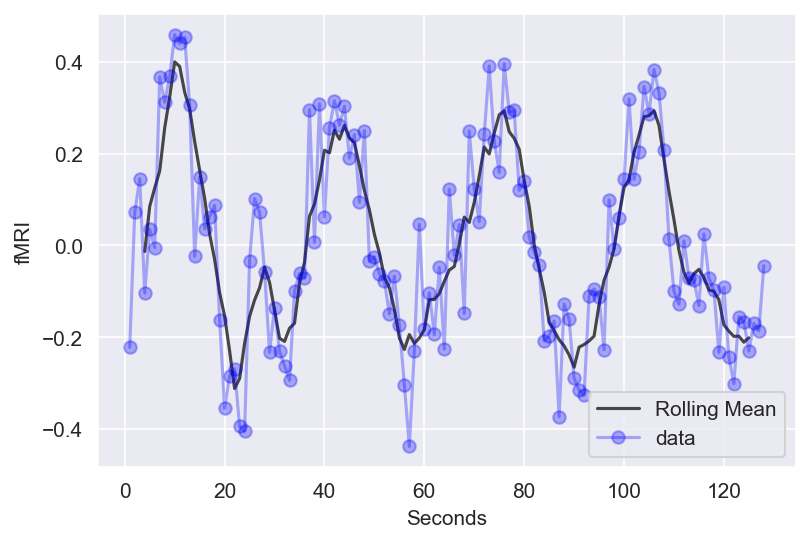

In [181]:
fig=plt.figure(dpi=150)
window_size=6
ma=moving_average(window_size,list(fmri_df['val.thal1']))
plt.xlabel('Seconds')
plt.ylabel('fMRI')
plt.plot(fmri_df['time'][int(window_size/2):len(fmri_df)-int(window_size/2)],ma,'k',alpha=0.7,label='Rolling Mean')
plt.plot(fmri_df['time'],fmri_df['val.thal1'],'b-o',alpha=0.3,label='data')
plt.legend()

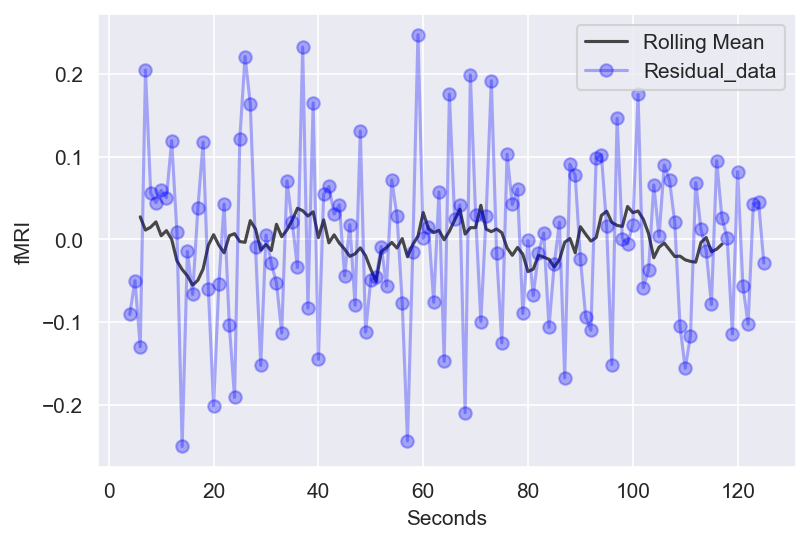

In [182]:
fig=plt.figure(dpi=150)
window_size1=10
resid=np.array(fmri_df['val.thal1'][int(window_size/2):len(fmri_df)-int(window_size/2)])-np.array(ma)
ma_1=moving_average(window_size1,list(resid))
plt.xlabel('Seconds')
plt.ylabel('fMRI')
plt.plot(fmri_df['time'][int(window_size1/2):len(resid)-int(window_size1/2)],ma_1,'k',alpha=0.7,label='Rolling Mean')
plt.plot(fmri_df['time'][int(window_size/2):len(fmri_df)-int(window_size/2)],resid,'b-o',alpha=0.3,label='Residual_data')

plt.legend()

In [184]:
adf_test(list(fmri_df['val.thal1']))

Results of Dickey-Fuller Test:
Test Statistic                  -5.225751
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [262]:
adf_test(list(df_solar['Monthly Mean Total Sunspot Number']))

Results of Dickey-Fuller Test:
Test Statistic                -1.049705e+01
p-value                        1.108552e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.236000e+03
Critical Value (1%)           -3.432372e+00
Critical Value (5%)           -2.862434e+00
Critical Value (10%)          -2.567246e+00
dtype: float64


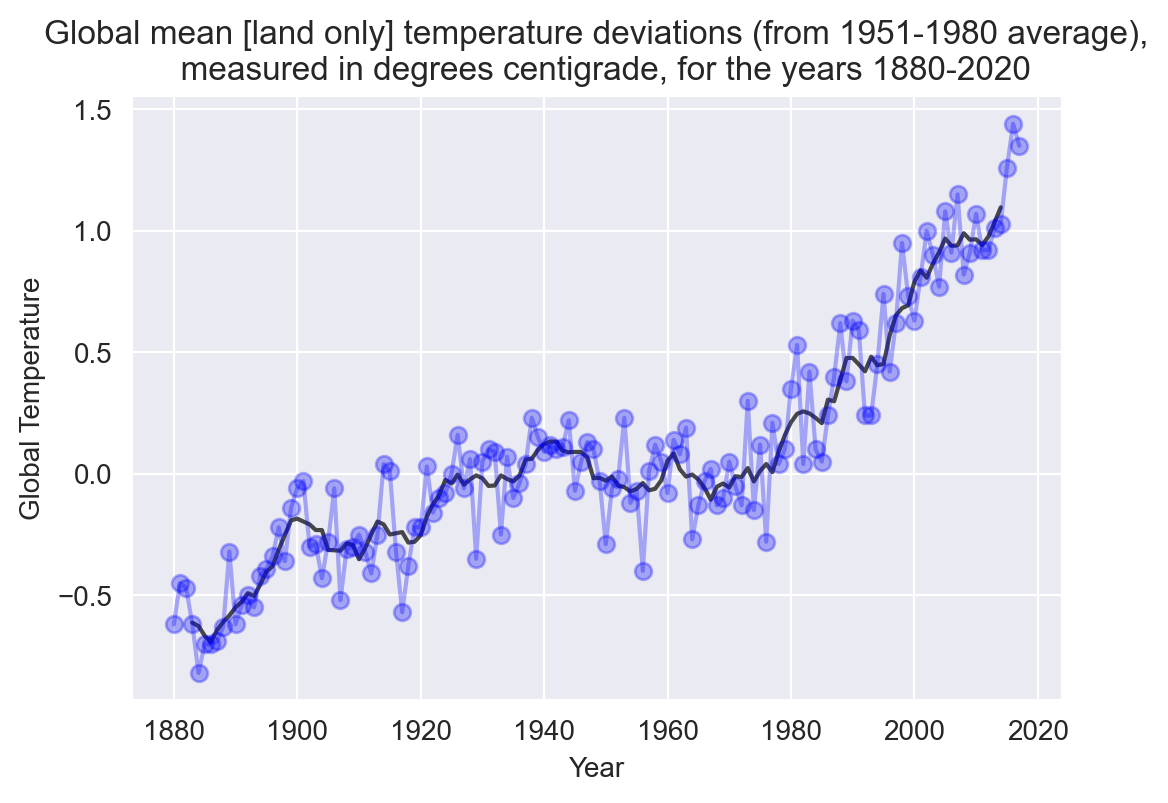

In [177]:
fig=plt.figure(dpi=200)
window_size=6
ma=moving_average(window_size,list(Gtemp_land['val']))
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.title("Global mean [land only] temperature deviations (from 1951-1980 average),\n  measured in degrees centigrade, for the years 1880-2020")
#plt.plot(Gtemp_land.time,Gtemp_land.val)
plt.plot(Gtemp_land['time'][int(window_size/2):len(Gtemp_land)-int(window_size/2)],ma,'k',alpha=0.7,label='Rolling Mean')
plt.plot(Gtemp_land.time,Gtemp_land.val,'b-o',alpha=0.3,label='data')


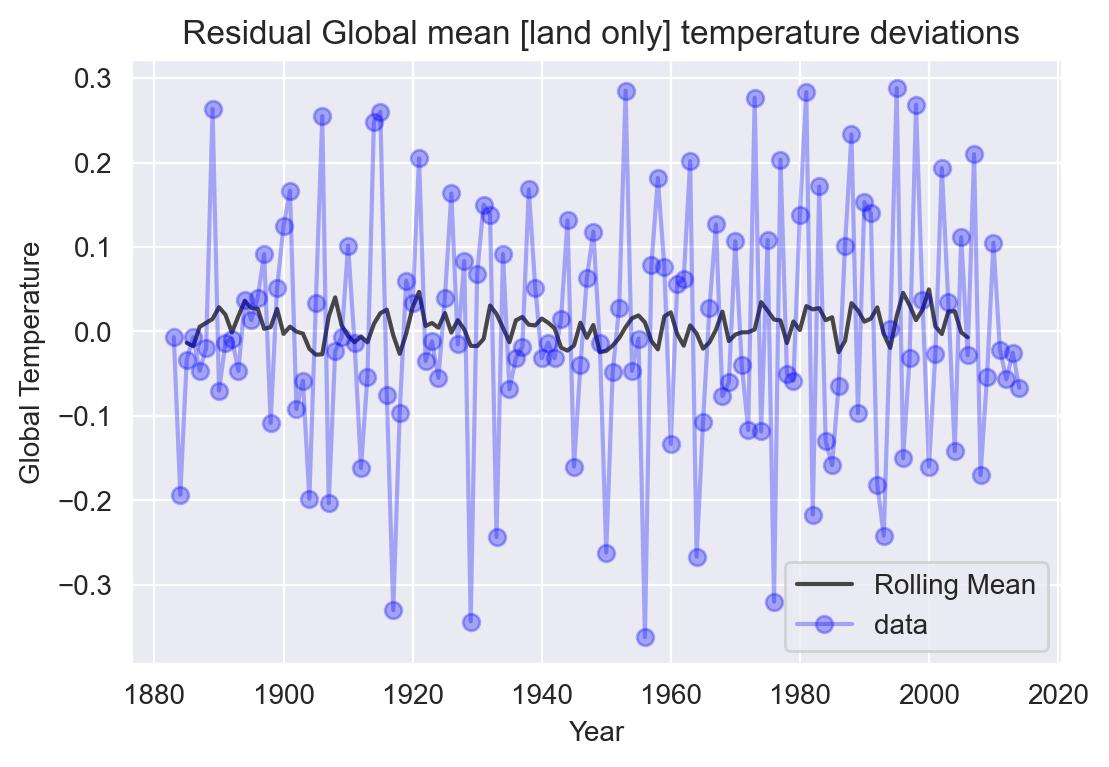

In [178]:
fig=plt.figure(dpi=200)
window_size1=10
resid=np.array(Gtemp_land['val'][int(window_size/2):len(Gtemp_land)-int(window_size/2)])-np.array(ma)
ma_1=moving_average(window_size1,list(resid))
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.title(" Residual Global mean [land only] temperature deviations")
#plt.plot(Gtemp_land.time,Gtemp_land.val)
plt.plot(Gtemp_land['time'][int(window_size1/2):len(resid)-int(window_size1/2)],ma_1,'k',alpha=0.7,label='Rolling Mean')
plt.plot(Gtemp_land['time'][int(window_size/2):len(Gtemp_land)-int(window_size/2)],resid,'b-o',alpha=0.3,label='data')
plt.legend()

In [179]:
adf_test(list(Gtemp_land['val']))

Results of Dickey-Fuller Test:
Test Statistic                   0.431456
p-value                          0.982634
#Lags Used                       3.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [180]:
adf_test(list(resid))

Results of Dickey-Fuller Test:
Test Statistic                -6.568133e+00
p-value                        8.061941e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.230000e+02
Critical Value (1%)           -3.484667e+00
Critical Value (5%)           -2.885340e+00
Critical Value (10%)          -2.579463e+00
dtype: float64


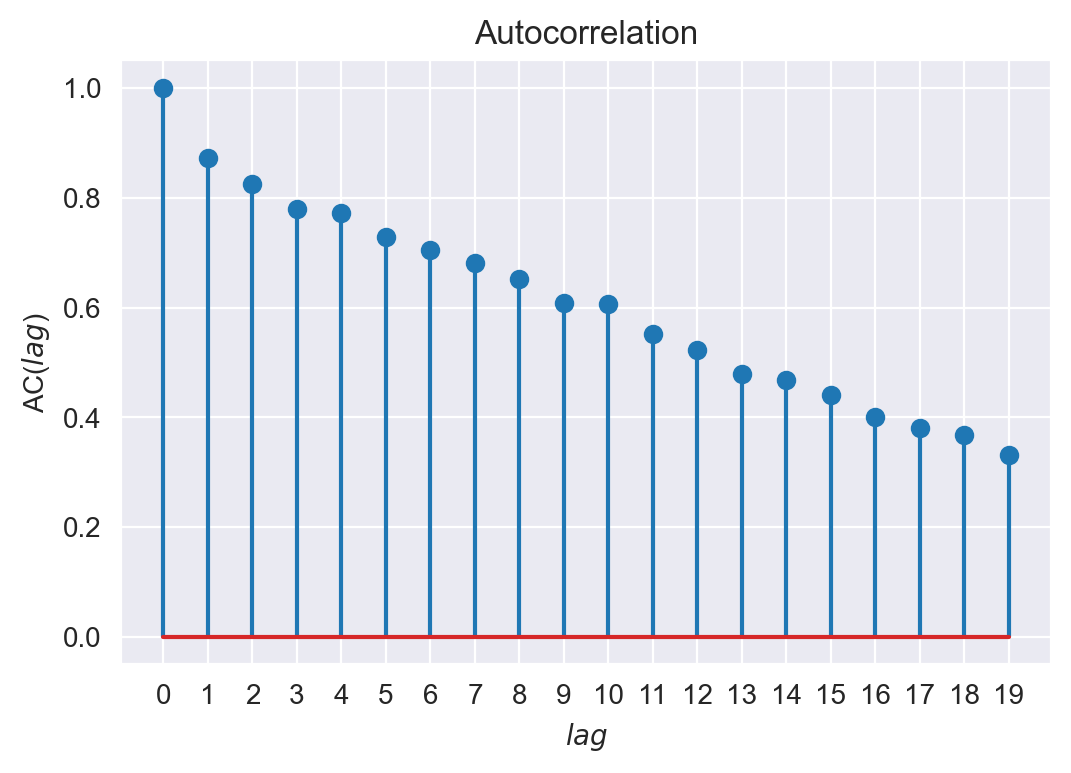

In [108]:
AC=[]
ax = plt.figure(dpi=200).gca()
plt.title("Autocorrelation")
plt.ylabel("AC($lag$)")
plt.xlabel("$lag$")
for x in range(20):
    AC.append(autocorrelation(list(Gtemp_land['val']),x))
plt.stem(AC)
ax.set_xticks(range(20))


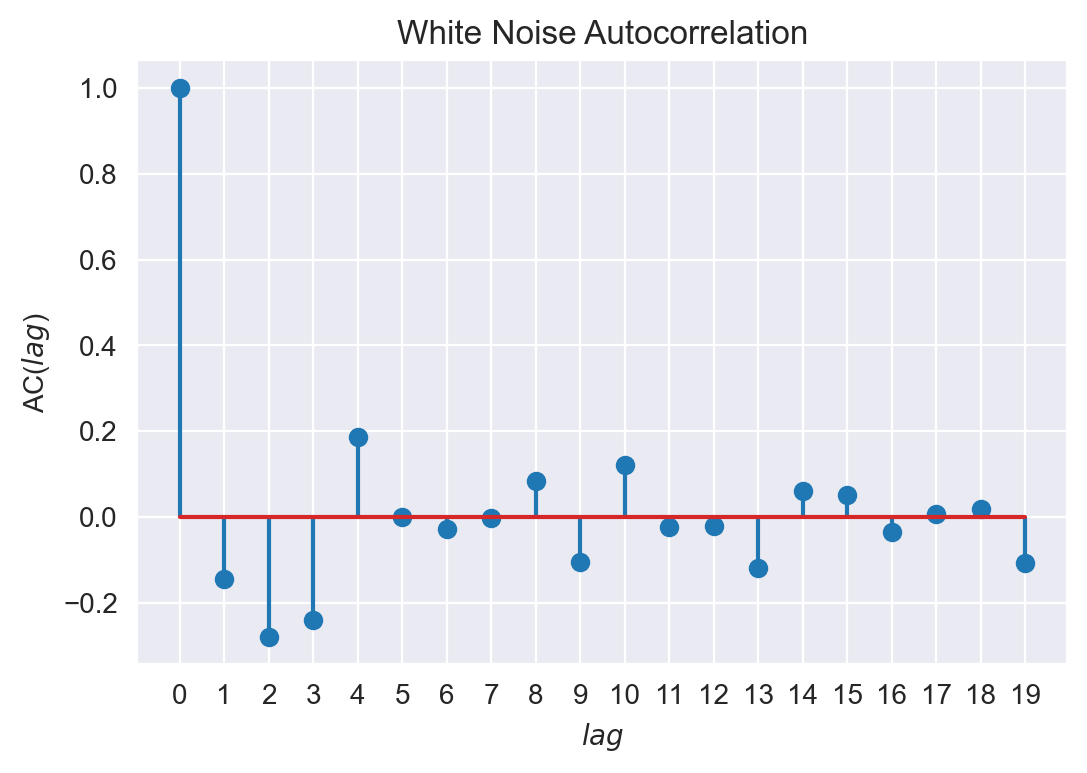

In [109]:
ax = plt.figure(dpi=200).gca()
plt.title("White Noise Autocorrelation")
plt.ylabel("AC($lag$)")
plt.xlabel("$lag$")
AC=[]
for x in range(20):
    AC.append(autocorrelation(list(resid),x))
plt.stem(AC)
ax.set_xticks(range(20))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

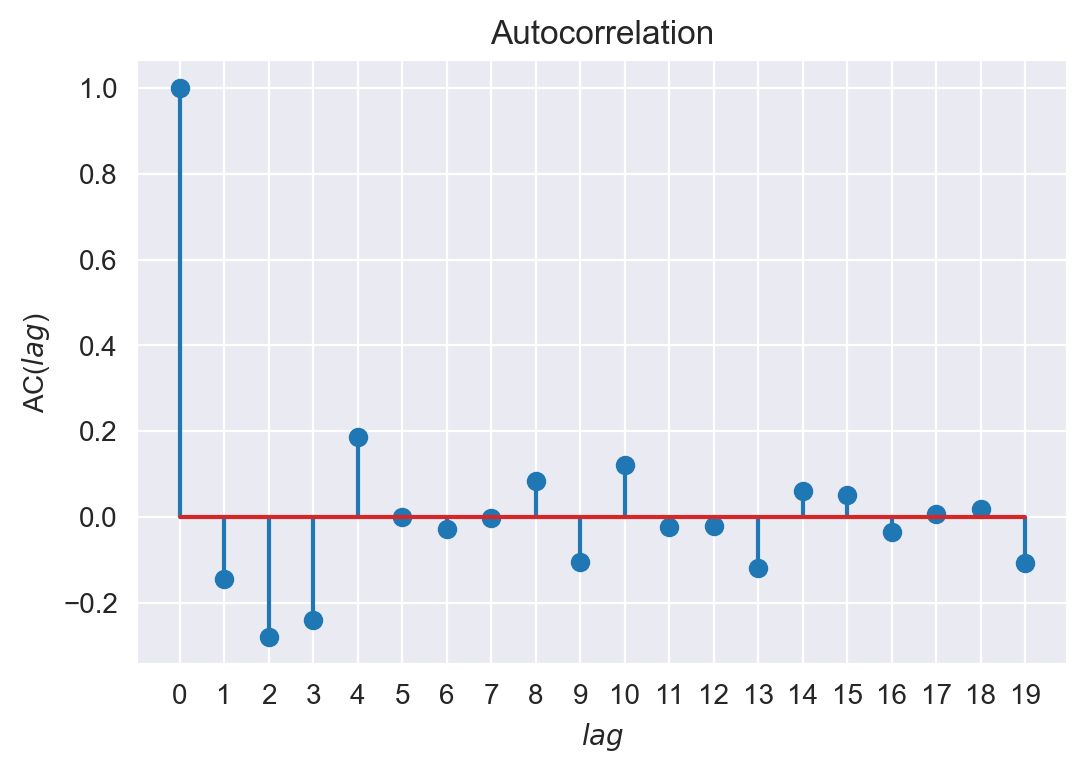

In [110]:
AC=[]
ax = plt.figure(dpi=200).gca()
plt.title("Autocorrelation")
plt.ylabel("AC($lag$)")
plt.xlabel("$lag$")
for x in range(20):
    AC.append(autocorrelation(list(resid),x))
plt.stem(AC)
ax.set_xticks(range(20))


In [111]:
adf(np.diff(list(Gtemp_land.val)),0)

-1.4280813031283754

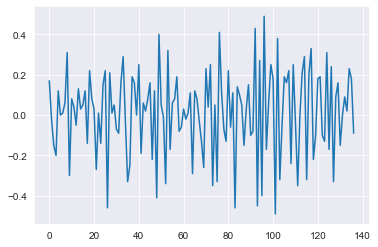

In [112]:
plt.plot(np.diff(list(Gtemp_land.val)))

In [113]:
adf_test(np.diff(list(Gtemp_land.val)))

Results of Dickey-Fuller Test:
Test Statistic                -1.149962e+01
p-value                        4.525094e-21
#Lags Used                     2.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [114]:
adf_test(Gtemp_land.val)

Results of Dickey-Fuller Test:
Test Statistic                   0.431456
p-value                          0.982634
#Lags Used                       3.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [115]:
adf(resid,0)

-1.1441540410043987

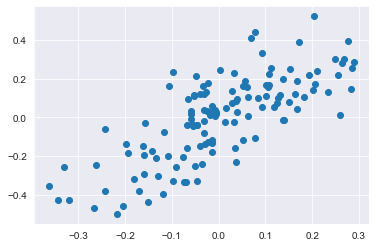

In [116]:
plt.plot(resid[1:len(resid)],np.diff(resid),'o')

-0.8721922713273094

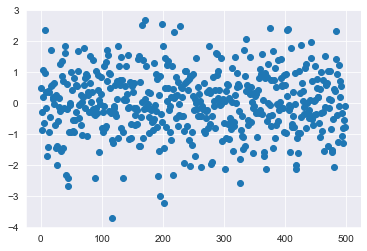

In [172]:
N=500
y=[0.5]
ydiff=[]
alpha=0.1
for i in range(1,N):
    y.append(alpha*y[i-1]+np.random.normal(0,1))
    ydiff.append(y[i]-y[i-1])
plt.plot(y,'o')

adf(y,0)

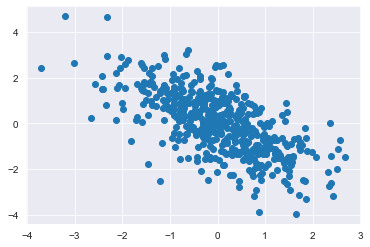

In [173]:
plt.plot(y[0:len(y)-1],ydiff,'o')

In [174]:
adf(np.diff(y),0)

-1.3726449955190925

In [175]:
adf(np.diff(np.diff(y)),0)

-1.5791937743578452

In [176]:
adf(np.diff(np.diff(np.diff(y))),0)

-1.6945479954494558

In [121]:
def stationarize_data(series,p:float =0.05,maximum_differencing:int=10,detrend:int =0):
    p_orig=adfuller(series)[1]
    if p_orig<p:
        return {
            'detrend':'None',
            'series':data,
            'p':p_orig
        }
    print(p_orig)
    p_obtained=p_orig
    count=0
    window_size=4
    data=series
    while p_obtained>p:
        if detrend==0:
            new_data=np.diff(data)
            p_obtained=adfuller(new_data)[1]
            count=count+1
        else:
            ma=moving_average(window_size,data)
            new_data=np.array(data[int(window_size/2):len(data)-int(window_size/2)])-ma
            p_obtained=adfuller(new_data)[1]
            count=count+1
        data=new_data
    if detrend==0:
        method='differencing'
    else:
        method='moving_average'
    return {
    'detrend':'Detrended {} times using {}'.format(count,method),
    'series':data,
    'p':p_obtained
    }

In [122]:
res1=stationarize_data(list(Gtemp_land['val']),0.05,10,1)
res=stationarize_data(list(Gtemp_land['val']),0.05,10,0)

0.9826339274089281
0.9826339274089281


In [123]:
res

{'detrend': 'Detrended 1 times using differencing',
 'series': array([ 0.17, -0.02, -0.15, -0.2 ,  0.12,  0.  ,  0.01,  0.06,  0.31,
        -0.3 ,  0.08,  0.04, -0.05,  0.13,  0.03,  0.05,  0.12, -0.14,
         0.22,  0.08,  0.03, -0.27,  0.01, -0.14,  0.15,  0.22, -0.46,
         0.21,  0.01,  0.05, -0.07, -0.09,  0.16,  0.29, -0.03, -0.33,
        -0.25,  0.19,  0.16,  0.  ,  0.25, -0.19,  0.06,  0.02,  0.08,
         0.16, -0.22,  0.12, -0.41,  0.4 ,  0.05, -0.01, -0.34,  0.32,
        -0.17,  0.06,  0.08,  0.19, -0.08, -0.06,  0.03, -0.02,  0.01,
         0.11, -0.29,  0.12,  0.08, -0.03, -0.13, -0.26,  0.23,  0.04,
         0.25, -0.35,  0.05, -0.33,  0.41,  0.11, -0.07, -0.13,  0.22,
        -0.06,  0.11, -0.46,  0.14,  0.1 ,  0.05, -0.15,  0.03,  0.15,
        -0.1 , -0.08,  0.43, -0.45,  0.27, -0.4 ,  0.49, -0.17,  0.06,
         0.25,  0.18, -0.49,  0.38, -0.32, -0.05,  0.19,  0.16,  0.22,
        -0.24,  0.25, -0.04, -0.35,  0.  ,  0.21,  0.29, -0.32,  0.2 ,
         0.33, 

In [124]:
res1

{'detrend': 'Detrended 1 times using moving_average',
 'series': array([ 0.07  , -0.03  , -0.1675,  0.01  ,  0.0275, -0.01  , -0.045 ,
         0.245 , -0.0925, -0.045 ,  0.0525, -0.0475,  0.045 ,  0.035 ,
         0.0025,  0.1075, -0.095 ,  0.055 ,  0.0875,  0.1025, -0.13  ,
        -0.0275, -0.105 , -0.015 ,  0.2625, -0.2275, -0.0125,  0.045 ,
         0.045 ,  0.    , -0.1025, -0.015 ,  0.1925,  0.14  , -0.11  ,
        -0.255 , -0.0075,  0.1275, -0.0225,  0.1725, -0.0475, -0.0225,
         0.005 ,  0.005 ,  0.155 , -0.1   ,  0.1075, -0.275 ,  0.085 ,
         0.1275,  0.0925, -0.2525,  0.1175, -0.02  , -0.0325,  0.0075,
         0.135 ,  0.0225, -0.0575,  0.005 , -0.005 , -0.0275,  0.13  ,
        -0.1475, -0.0325,  0.0775,  0.0375, -0.0075, -0.22  ,  0.04  ,
         0.015 ,  0.2225, -0.125 ,  0.02  , -0.255 ,  0.095 ,  0.175 ,
         0.025 , -0.1375,  0.0925, -0.0025,  0.155 , -0.2375, -0.07  ,
         0.0725,  0.0875, -0.07  , -0.06  ,  0.1075,  0.0075, -0.1725,
         0.30

In [125]:
adfuller(res['series'])

(-11.499617308276125,
 4.525094462220858e-21,
 2,
 134,
 {'1%': -3.480118600110386,
  '5%': -2.8833618426136196,
  '10%': -2.578407034974382},
 -68.50118998074666)

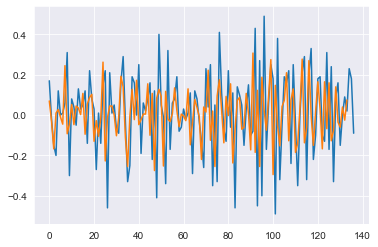

In [126]:
plt.plot(res['series'])
plt.plot(res1['series'])

In [127]:
adf(data_left,0)

C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in short_scalars
  del sys.path[0]
C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in short_scalars
  
C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in short_scalars
  import sys


0.16616564639927422

In [187]:
climate_df=pd.read_csv('data/data_climate.csv')

In [188]:
climate_df['datetime_utc']=pd.to_datetime(climate_df['datetime_utc'])
climate_df['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [189]:
temp_df=climate_df[['datetime_utc',' _tempm']].copy()

C:\Users\atiya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


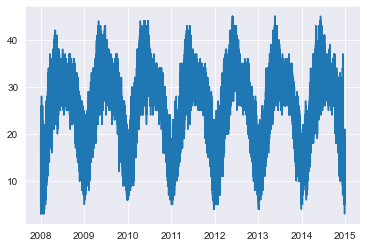

In [226]:
temp_df.rename(columns = {'datetime_utc':'TIME'}, inplace = True)

temp_df1=temp_df[temp_df['TIME']>'2008']
temp_df1=temp_df1[temp_df1['TIME']<'2015']
temp_df1.dropna(0,inplace=True)
plt.plot(temp_df1['TIME'],temp_df1[' _tempm'])

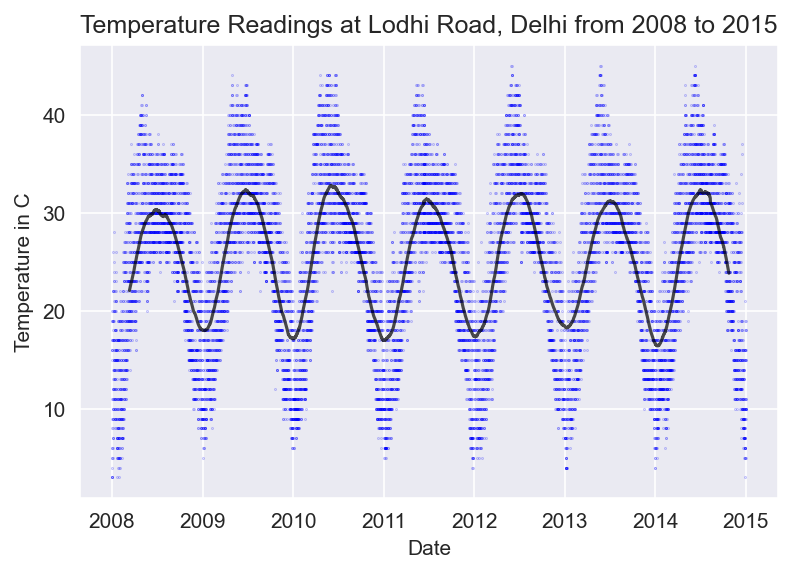

In [246]:
ws=365*3+1
ax = plt.figure(dpi=150).gca()
plt.title("Temperature Readings at Lodhi Road, Delhi from 2008 to 2015")
plt.ylabel("Temperature in C")
plt.xlabel("Date")
mov_mean=moving_average(ws,list(temp_df1[' _tempm']))
plt.plot(temp_df1['TIME'],temp_df1[' _tempm'],'b.', linewidth=1, markersize=0.5,alpha=0.4)
plt.plot(temp_df1['TIME'][int(ws/2):len(temp_df1)-int(ws/2)],mov_mean,'k',alpha=0.7,label='Rolling Mean')

#plt.plot(list(temp_df1['TIME'][int(ws/2):NN-int(ws/2)]),mov_mean)


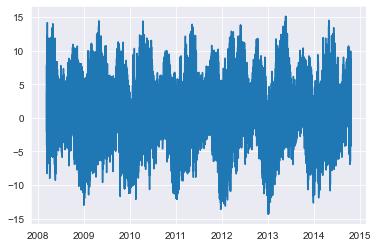

In [241]:
resid=np.array(temp_df1[' _tempm'][int(ws/2):len(temp_df1)-int(ws/2)])-np.array(mov_mean)
plt.plot(temp_df1['TIME'][int(ws/2):len(temp_df1)-int(ws/2)],resid)

In [252]:
mov_mean=moving_average(10000,resid)

In [255]:
np.var(resid[0:500])

29.032075039413392

In [254]:
np.var(resid[len(resid)-500:len(resid)])

15.299426631266982

In [243]:
adf_test(list(resid))

Results of Dickey-Fuller Test:
Test Statistic                -8.429824e+00
p-value                        1.883309e-13
#Lags Used                     4.300000e+01
Number of Observations Used    1.785800e+04
Critical Value (1%)           -3.430716e+00
Critical Value (5%)           -2.861702e+00
Critical Value (10%)          -2.566856e+00
dtype: float64


In [244]:
adf_test(list(temp_df1[' _tempm']))

Results of Dickey-Fuller Test:
Test Statistic                    -3.342973
p-value                            0.013063
#Lags Used                        42.000000
Number of Observations Used    18955.000000
Critical Value (1%)               -3.430695
Critical Value (5%)               -2.861692
Critical Value (10%)              -2.566851
dtype: float64


In [256]:
adf_test(DJI['dat'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.430233
p-value                           0.904927
#Lags Used                       37.000000
Number of Observations Used    8572.000000
Critical Value (1%)              -3.431113
Critical Value (5%)              -2.861877
Critical Value (10%)             -2.566950
dtype: float64


In [257]:
adf_test(fmri_df['val.thal1'])

Results of Dickey-Fuller Test:
Test Statistic                  -5.225751
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [ ]:
adf_test()